In [191]:
import pandas as pd
from pandas import DataFrame

first_ds = "first_output.csv" # millis 0 = 25/04/2025 00:56
second_ds = "second_output.csv" # millis 0 = 25/04/2025 19:57



In [192]:
first_df = pd.read_csv(first_ds)
first_df

,time_ms,soil,light,temp_c
0,3636,1406,1770,21.2
1,240778,1470,960,21.2
2,1140872,1530,844,21.0
3,2041008,1525,959,21.0
4,2941831,1668,895,21.0
...,...,...,...,...
70,62342854,1528,1033,23.8
71,63240824,1630,833,23.7
72,64140824,1533,963,23.6
73,65040049,1580,798,23.7


In [193]:
second_df = pd.read_csv(second_ds)
second_df

,time_ms,soil,light,temp_c
0,900679,1505,1819,23.3
1,1800719,1467,1766,23.3
2,2700759,1535,1226,23.4
3,3600855,1554,1985,23.4
4,4500895,1459,2013,23.4
...,...,...,...,...
174,157508996,1575,4095,22.1
175,158409092,1595,4095,22.1
176,159309132,1584,4095,22.2
177,160209173,1707,4095,22.0


In [194]:
start_time_first = pd.Timestamp("2025-04-25 00:56:00")

start_time_second = pd.Timestamp("2025-04-25 19:57:00")

first_df["timestamp"] = start_time_first + pd.to_timedelta(first_df["time_ms"], unit="ms")

second_df["timestamp"] = start_time_second + pd.to_timedelta(second_df["time_ms"], unit="ms")

df = pd.concat([first_df, second_df], axis=0)

df= df[["timestamp", "soil", "light", "temp_c"]]

df = df.sort_values("timestamp")
df

,timestamp,soil,light,temp_c
0,2025-04-25 00:56:03.636,1406,1770,21.2
1,2025-04-25 01:00:00.778,1470,960,21.2
2,2025-04-25 01:15:00.872,1530,844,21.0
3,2025-04-25 01:30:01.008,1525,959,21.0
4,2025-04-25 01:45:01.831,1668,895,21.0
...,...,...,...,...
174,2025-04-27 15:42:08.996,1575,4095,22.1
175,2025-04-27 15:57:09.092,1595,4095,22.1
176,2025-04-27 16:12:09.132,1584,4095,22.2
177,2025-04-27 16:27:09.173,1707,4095,22.0


In [195]:
targets = ("muerta", "marchita", "riego", "saludable", "ahogada")

In [196]:
df["target"] = None

In [197]:
def assign_target(df, start_timestamp, end_timestamp, label):
    start = pd.to_datetime(start_timestamp)
    end = pd.to_datetime(end_timestamp)


    def set_label(row):
        if start <= pd.to_datetime(row["timestamp"]) < end:
            return label
        return row["target"]

    df["target"] = df.apply(set_label, axis=1)


assign_target(df, "2025-04-25 00:56:00", "2025-04-26 09:00:00", "Saludable")
assign_target(df, "2025-04-26 09:00:00", "2025-04-27 09:00:00", "Necesita riego")
assign_target(df, "2025-04-27 09:00:00", "2025-04-28 00:00:00", "Hojas marchitas")

In [198]:
df

,timestamp,soil,light,temp_c,target
0,2025-04-25 00:56:03.636,1406,1770,21.2,Saludable
1,2025-04-25 01:00:00.778,1470,960,21.2,Saludable
2,2025-04-25 01:15:00.872,1530,844,21.0,Saludable
3,2025-04-25 01:30:01.008,1525,959,21.0,Saludable
4,2025-04-25 01:45:01.831,1668,895,21.0,Saludable
...,...,...,...,...,...
174,2025-04-27 15:42:08.996,1575,4095,22.1,Hojas marchitas
175,2025-04-27 15:57:09.092,1595,4095,22.1,Hojas marchitas
176,2025-04-27 16:12:09.132,1584,4095,22.2,Hojas marchitas
177,2025-04-27 16:27:09.173,1707,4095,22.0,Hojas marchitas


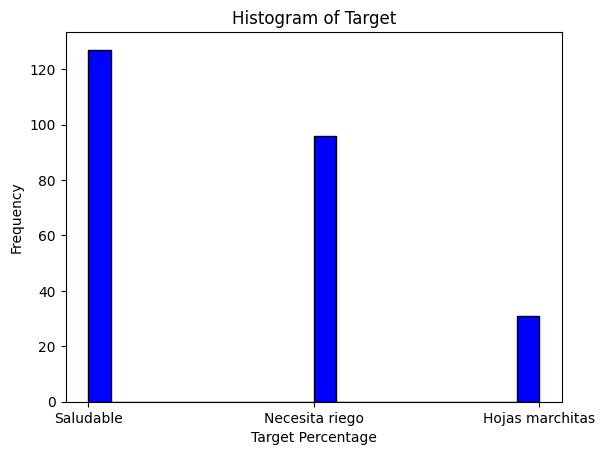

In [199]:
import matplotlib.pyplot as plt

plt.hist(df['target'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Target')
plt.xlabel('Target Percentage')
plt.ylabel('Frequency')
plt.show()

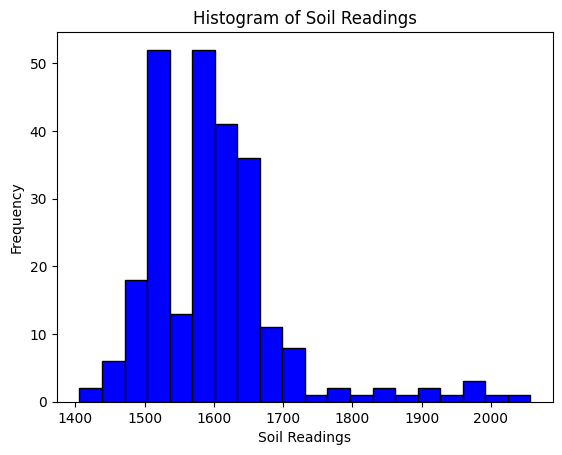

In [200]:
import matplotlib.pyplot as plt

plt.hist(df["soil"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Soil Readings')
plt.xlabel('Soil Readings')
plt.ylabel('Frequency')
plt.show()

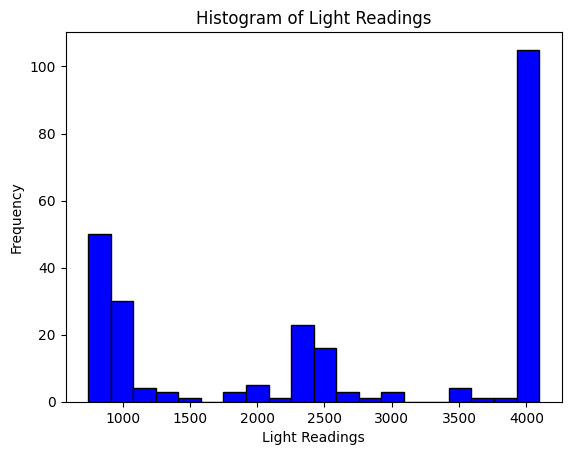

In [201]:
import matplotlib.pyplot as plt

plt.hist(df["light"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Light Readings')
plt.xlabel('Light Readings')
plt.ylabel('Frequency')
plt.show()